 # Expand rules
To be used in conjunction with examine model.

1. builds out rule for a reaction identified
2. re-runs rmg
3. recreates input files for peuqse


## 1. build out rule for identified reaction


In [1]:
import os
import sys
import numpy as np
import pandas as pd
import itertools
import yaml
import pickle
import multiprocessing
import time 
import subprocess

repo_dir = os.path.dirname(os.path.dirname(os.path.abspath("")))
sys.path.append(repo_dir)

from rmg_gua.expand_tree.expand_rules import make_new_rule

In [2]:
# most sensitive reaction from the model
with open("sens_cmkn_dict.pickle", "rb") as f:
    sens_rxn = pickle.load(f)

In [3]:
# or, use the list of reactions: 
with open("reac_list.pkl", "rb") as f:
    sens_rxn = pickle.load(f)

In [4]:
# expand the rules: 
model_path = os.path.abspath("")
rmg_db_folder = os.path.join(os.path.dirname(os.environ["RMGPY"]), "RMG-database")

if isinstance(sens_rxn, list): 
    for rxn in sens_rxn:
        make_new_rule(model_path=model_path, rmg_db_folder=rmg_db_folder, sens_rxn=rxn)
        print("reaction done")
else:
    make_new_rule(model_path=model_path, rmg_db_folder=rmg_db_folder, sens_rxn=sens_rxn)

key already exists for C-OH;VacantSite, updating entry
reaction done
key already exists for C-OH;*=C=R, updating entry
reaction done
key already exists for C-OH;*C=R, updating entry
reaction done


In [2]:
# run non-verbose model:
import subprocess
subprocess.run([sys.executable+"-jl", os.environ["RMG"], "input.py"])

:root:Removing old /Users/blais.ch/Documents/_01_code/05_Project_repos_Github/meOH_repos/uncertainty_analysis/rmg_gua/rmg_model/RMG_backup.log
:root:Moving /Users/blais.ch/Documents/_01_code/05_Project_repos_Github/meOH_repos/uncertainty_analysis/rmg_gua/rmg_model/RMG.log to /Users/blais.ch/Documents/_01_code/05_Project_repos_Github/meOH_repos/uncertainty_analysis/rmg_gua/rmg_model/RMG_backup.log



Global RMG Settings:
   database.directory   = /Users/blais.ch/Documents/_01_code/RMG_env_1/RMG-database/input (Default, relative to RMG-Py source code)
   test_data.directory  = /Users/blais.ch/Documents/_01_code/RMG_env_1/RMG-Py/rmgpy/test_data (Default, relative to RMG-Py source code)
RMG execution initiated at Wed Aug  2 10:14:21 2023

#########################################################
# RMG-Py - Reaction Mechanism Generator in Python       #
# Version: 3.1.0                                        #
# Authors: RMG Developers (rmg_dev@mit.edu)             #
# P.I.s:   William H. Green (whgreen@mit.edu)           #
#          Richard H. West (r.west@neu.edu)             #
# Website: http://reactionmechanismgenerator.github.io/ #
#########################################################

The current git HEAD for RMG-Py is:
	b'48282c3ba4ed49e7f02d81439f8a2c39117e025f'
	b'Mon Jul 24 15:37:42 2023 -0400'

The current git HEAD for RMG-database is:
	b'482f2d957639d13fcce66c18883835f

/Users/blais.ch/opt/anaconda3/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/optimize.py:2077: LinAlgWarning: Ill-conditioned matrix (rcond=9.78829e-18): result may not be accurate.
  fu = func(x, *args)
/Users/blais.ch/opt/anaconda3/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/optimize.py:2077: LinAlgWarning: Ill-conditioned matrix (rcond=8.30526e-20): result may not be accurate.
  fu = func(x, *args)
/Users/blais.ch/opt/anaconda3/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/optimize.py:2077: LinAlgWarning: Ill-conditioned matrix (rcond=1.38146e-20): result may not be accurate.
  fu = func(x, *args)
/Users/blais.ch/opt/anaconda3/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/optimize.py:2077: LinAlgWarning: Ill-conditioned matrix (rcond=8.43874e-21): result may not be accurate.
  fu = func(x, *args)
/Users/blais.ch/opt/anaconda3/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/optimize.py:2077: LinAlgWarning: Ill-conditioned matrix (rcond


Summary of Model Enlargement
---------------------------------
Added 0 new core species
Created 8 new edge species
    H(24)
    O2(25)
    O(26)
    OH(27)
    Ar(28)
    He(29)
    HO2(30)
    H2O2(31)
Added 0 new core reactions
Created 30 new edge reactions
    O2(25) + H(24) <=> O(26) + OH(27)
    O(26) + H2(2) <=> H(24) + OH(27)
    OH(27) + H2(2) <=> H(24) + H2O(5)
    OH(27) + OH(27) <=> O(26) + H2O(5)
    H2(2) <=> H(24) + H(24)
    Ar(28) + H2(2) <=> Ar(28) + H(24) + H(24)
    He(29) + H2(2) <=> He(29) + H(24) + H(24)
    O(26) + O(26) <=> O2(25)
    Ar(28) + O(26) + O(26) <=> Ar(28) + O2(25)
    He(29) + O(26) + O(26) <=> He(29) + O2(25)
    O(26) + H(24) <=> OH(27)
    H2O(5) <=> H(24) + OH(27)
    H2O(5) + H2O(5) <=> H(24) + OH(27) + H2O(5)
    O2(25) + H(24) <=> HO2(30)
    H(24) + HO2(30) <=> O2(25) + H2(2)
    H(24) + HO2(30) <=> OH(27) + OH(27)
    O(26) + HO2(30) <=> O2(25) + OH(27)
    OH(27) + HO2(30) <=> O2(25) + H2O(5)
    HO2(30) + HO2(30) <=> O2(25) + H2O2(31)
 

CompletedProcess(args=['/Users/blais.ch/opt/anaconda3/envs/rmg_env/bin/python-jl', '/Users/blais.ch/Documents/_01_code/RMG_env_1/RMG-Py/rmg.py', 'input.py'], returncode=0)

In [6]:
# with the completed model, make new config files
from rmg_gua.gua_cantera.Spinning_basket_reactor.make_peuq_config import make_rmg_reac_config, make_be_peuq_input, \
    trim_rule_file, make_ck_reac_config, make_be_config
from rmg_gua.gua_peuqse.peuqse_utilities import make_ct_expt_file, make_lookup_dict

model_path = os.path.abspath("")
base_path = os.path.join(repo_dir, "rmg_gua", "baseline")
results_path = os.path.join(model_path, "config")
rmg_path = os.path.dirname(os.environ["RMGPY"])

# make yamls for our expt response and uncertainty
if not os.path.exists(os.path.join(results_path, "expt_data.yaml")):
    make_ct_expt_file(results_path=results_path, use_peuq_expts=True)

# make the kinetic input files
make_rmg_reac_config(rmg_path=rmg_path, results_path=results_path)
make_ck_reac_config(results_path=results_path, trim_rules=True, model_path=model_path)

# make the value, uncertainty, upper bound, and lower bound files for our parameters
make_be_peuq_input(results_path = results_path)
make_be_config(results_path=results_path, return_test_spec=True, model_path=model_path)

# make the lookup dict
make_lookup_dict(model_path, results_path=results_path)

uncertainty repo path:  /Users/blais.ch/Documents/_01_code/05_Project_repos_Github/meOH_repos/uncertainty_analysis
loading rmg database


A out of bounds for  Surface_Adsorption_Dissociative  :  CH4;VacantSite1;VacantSite2  :  0.17897694729316943  +/-  1
A out of bounds for  Surface_EleyRideal_Addition_Multiple_Bond  :  Adsorbate1;Gas  :  -5.301029995663981  +/-  1
loading rmg database


removing rule:  Surface_Abstraction : Abstracting;*R-H  from config files
removing rule:  Surface_Abstraction : O;*OH  from config files
removing rule:  Surface_Abstraction : C;*C-H  from config files
removing rule:  Surface_Abstraction : O;*=CH-H  from config files
removing rule:  Surface_Abstraction : O;*-CH-H  from config files
removing rule:  Surface_Abstraction : C;*-CH-H  from config files
removing rule:  Surface_Abstraction : C;*=CH-H  from config files
removing rule:  Surface_Abstraction : C;*-CH2-H  from config files
removing rule:  Surface_Abstraction : O;*-CH2-H  from config files
removing rule:  Surface_Abstraction_Beta : Abstracting;Donating  from config files
removing rule:  Surface_Abstraction_Beta : O;R-C-H  from config files
removing rule:  Surface_Abstraction_Beta : O;R-O-H  from config files
removing rule:  Surface_Abstraction_Beta : O;R-CH3  from config files
removing rule:  Surface_Abstraction_Beta : Abstracting;R-CH3  from config files
removing rule:  Surface_Adso

{'N2': 'N2',
 'Ne': 'Ne',
 'H2': 'H2(2)',
 'CO': 'CO(3)',
 'CO2': 'CO2(4)',
 'H2O': 'H2O(5)',
 'CH2O': 'CH2O(6)',
 'HCOOH': 'HCOOH(7)',
 'CH3OH': 'CH3OH(8)',
 'HCOOCH3': 'HCOOCH3(9)',
 'C': 'C(40)',
 'CC=O': 'C2H4O(127)',
 'CC(=O)O': 'C2H4O2(128)',
 'X': 'X(1)',
 'H*': 'H*(10)',
 'O*': 'O*(11)',
 'OH*': 'OH*(12)',
 'H2O*': 'H2O*(13)',
 'CO*': 'CO*(14)',
 'CO2*': 'CO2*(15)',
 'HCO*': 'HCO*(16)',
 'HCOO*': 'HCOO*(17)',
 'COOH*': 'COOH*(18)',
 'HCOOH*': 'HCOOH*(19)',
 'CH2O*': 'CH2O*(20)',
 'CH3O*': 'CH3O*(21)',
 'CH3O2*': 'CH3O2*(22)',
 'CH3OH*': 'CH3OH*(23)',
 'OC[Pt]': 'OC[Pt](45)',
 'C[Pt]': 'C[Pt](55)',
 'CC(=O)[Pt]': 'C2H3OX(96)',
 'CC=O.[Pt]': 'C2H4OX(104)',
 'CC(=O)O.[Pt]': 'C2H4O2X(109)',
 'C=C=O.[Pt]': 'C2H2OX(136)',
 'C=C(O)O[Pt]': 'C2H3O2X(149)'}

In [7]:
with open("./config/rule_config.yaml", "r") as f:
    rule_config = yaml.load(f, Loader=yaml.FullLoader)

len(rule_config)*3

123

## troubleshooting: why do we get different results for the rule source with different levels of verbosity. 


In [4]:
# run verbose model: 
import subprocess
subprocess.run([sys.executable+"-jl", os.environ["RMG"], "../rmg_model_verbose/input.py"])

:root:Removing old /Users/blais.ch/Documents/_01_code/05_Project_repos_Github/meOH_repos/uncertainty_analysis/rmg_gua/rmg_model_verbose/RMG_backup.log
:root:Moving /Users/blais.ch/Documents/_01_code/05_Project_repos_Github/meOH_repos/uncertainty_analysis/rmg_gua/rmg_model_verbose/RMG.log to /Users/blais.ch/Documents/_01_code/05_Project_repos_Github/meOH_repos/uncertainty_analysis/rmg_gua/rmg_model_verbose/RMG_backup.log

/Users/blais.ch/opt/anaconda3/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/optimize.py:2077: LinAlgWarning: Ill-conditioned matrix (rcond=9.78829e-18): result may not be accurate.
  fu = func(x, *args)
/Users/blais.ch/opt/anaconda3/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/optimize.py:2077: LinAlgWarning: Ill-conditioned matrix (rcond=8.30526e-20): result may not be accurate.
  fu = func(x, *args)
/Users/blais.ch/opt/anaconda3/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/optimize.py:2077: LinAlgWarning: Ill-conditioned matrix (rcond=

CompletedProcess(args=['/Users/blais.ch/opt/anaconda3/envs/rmg_env/bin/python-jl', '/Users/blais.ch/Documents/_01_code/RMG_env_1/RMG-Py/rmg.py', '../rmg_model_verbose/input.py'], returncode=0)

In [6]:
# load the chemkin files 
# expand rules with the most sensitive reaction
# load the chemkin file for the mechanism
from rmgpy.chemkin import load_chemkin_file
from rmgpy.rmg.model import ReactionModel
from rmgpy.species import Species

# load the non-verbose model: 
rmg_model_folder = os.path.join(repo_dir, "rmg_gua", "rmg_model")

chemkin_file = os.path.join(rmg_model_folder, "chemkin", "chem_annotated-gas.inp")
chemkin_surf_file = os.path.join(rmg_model_folder, "chemkin", "chem_annotated-surface.inp")
chemkin_dict = os.path.join(rmg_model_folder, "chemkin", "species_dictionary.txt")
model = ReactionModel()

model.species, model.reactions = load_chemkin_file(
    chemkin_file,
    chemkin_dict, 
    use_chemkin_names=True,
    surface_path=chemkin_surf_file,
    )

# load the verbose model: 
rmg_model_folder = os.path.join(repo_dir, "rmg_gua", "rmg_model_verbose")

chemkin_file = os.path.join(rmg_model_folder, "chemkin", "chem_annotated-gas.inp")
chemkin_surf_file = os.path.join(rmg_model_folder, "chemkin", "chem_annotated-surface.inp")
chemkin_dict = os.path.join(rmg_model_folder, "chemkin", "species_dictionary.txt")
model_vb = ReactionModel()

model_vb.species, model_vb.reactions = load_chemkin_file(
    chemkin_file,
    chemkin_dict, 
    use_chemkin_names=True,
    surface_path=chemkin_surf_file,
    )

In [10]:
# load the kinetics database
# rmg_db_folder= "/Users/blais.ch/Documents/_01_code/RMG_env_1/RMG-database/"
# Specify the path to the families
from rmgpy.data.base import Entry
from rmgpy.reaction import Reaction
from rmgpy.data.kinetics import KineticsDatabase
from rmgpy.data.kinetics.family import TemplateReaction

rmg_db_folder = os.path.join(os.path.dirname(os.environ["RMGPY"]), "RMG-database")
families_dir = os.path.join(rmg_db_folder,"input","kinetics","families")
if not os.path.exists(families_dir):
    raise OSError(f'Path to rules does not exist:\n{families_dir}')

# Specify the path to the libraries
kinetic_libraries_dir = os.path.join(rmg_db_folder,"input","kinetics","libraries","Surface")
if not os.path.exists(kinetic_libraries_dir):
    raise OSError(f'Path to kinetic libraries does not exist:\n{kinetic_libraries_dir}')

# do not load training, this will create more rules. in future, may want to 
# create those rules for perturbation, not sure. 
kinetics_families = ['all']
kinetics_database = KineticsDatabase()
kinetics_database.load_families(
        path=families_dir,
        families=kinetics_families,)

In [53]:
# family = 'Surface_Abstraction_Single_vdW'
# family = 'Surface_Abstraction'
for rxn in model_vb.reactions: 
    # if rxn.get_source() == family:
    if rxn.is_surface_reaction():
        family = rxn.get_source()
        source_info_vb = kinetics_database.families[family].extract_source_from_comments(rxn)
        print(family, source_info_vb[1][1]['rules'], source_info_vb[1][1]['exact'])
            # print(source_info)
            # display(rxn)
            # break
            

Surface_Adsorption_vdW [(<Entry index=1 label="Adsorbate;VacantSite">, 1)] False
Surface_Adsorption_vdW [(<Entry index=1 label="Adsorbate;VacantSite">, 1)] False
Surface_EleyRideal_Addition_Multiple_Bond [(<Entry index=1 label="Adsorbate1;Gas">, 1)] False
Surface_Migration [(<Entry index=1 label="Adsorbate1">, 1)] True
Surface_EleyRideal_Addition_Multiple_Bond [(<Entry index=1 label="Adsorbate1;Gas">, 1)] False
Surface_Adsorption_vdW [(<Entry index=1 label="Adsorbate;VacantSite">, 1)] False
Surface_Adsorption_vdW [(<Entry index=1 label="Adsorbate;VacantSite">, 1)] False
Surface_EleyRideal_Addition_Multiple_Bond [(<Entry index=1 label="Adsorbate1;Gas">, 1)] False
Surface_EleyRideal_Addition_Multiple_Bond [(<Entry index=1 label="Adsorbate1;Gas">, 1)] False
Surface_EleyRideal_Addition_Multiple_Bond [(<Entry index=1 label="Adsorbate1;Gas">, 1)] False
Surface_Adsorption_vdW [(<Entry index=1 label="Adsorbate;VacantSite">, 1)] False
Surface_Adsorption_Dissociative [(<Entry index=2 label="H2;V

1


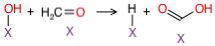

In [47]:
family = 'Surface_Abstraction_Single_vdW'
for rxn in model.reactions: 
    if rxn.get_source() == family:
        source_info_nvb = kinetics_database.families[family].extract_source_from_comments(rxn)
        print(len(source_info[1][1]['rules']))
        display(rxn)
        break

In [54]:
source_info_vb[1][1]['degeneracy']

(False,
 ['Surface_Adsorption_Dissociative',
  {'template': [<Entry index=16 label="CH4">,
    <Entry index=2 label="VacantSite1">,
    <Entry index=3 label="VacantSite2">],
   'degeneracy': 2.0,
   'exact': True,
   'rules': [(<Entry index=3 label="CH4;VacantSite1;VacantSite2">, 1)],
   'training': []}])

In [60]:
source_info_vb[1][1]['rules'][0][0].label

'CH4;VacantSite1;VacantSite2'